Classification Report:
              precision    recall  f1-score   support

    negative       0.62      1.00      0.77       889
     neutral       0.60      0.01      0.02       313
    positive       0.85      0.05      0.09       244

    accuracy                           0.62      1446
   macro avg       0.69      0.35      0.29      1446
weighted avg       0.65      0.62      0.49      1446



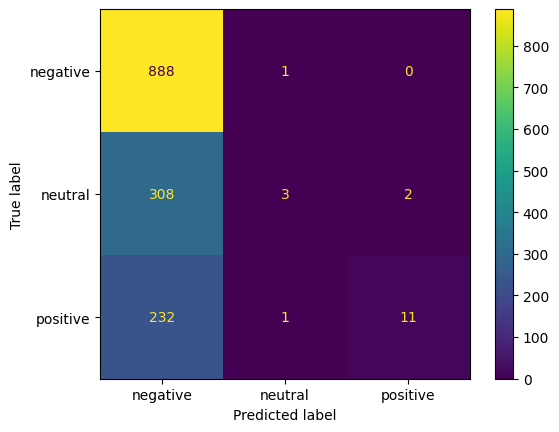

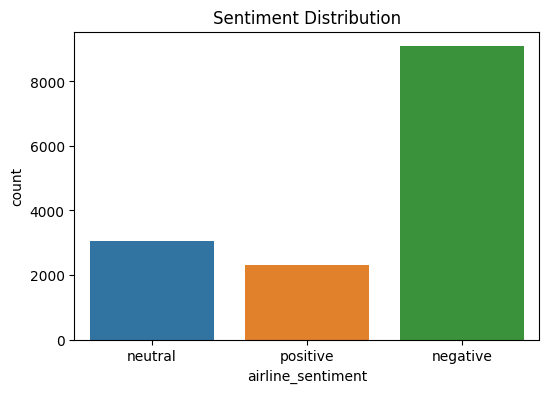

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

# Load dataset from Kaggle input path
df = pd.read_csv('/kaggle/input/twitter-irline-sentiment/Tweets.csv')

# Keep only necessary columns
df = df[['text', 'airline_sentiment']]
df.drop_duplicates(inplace=True)

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\\S+", "", text)
    text = re.sub(r"[^a-z\\s]", "", text)
    return text

# Apply cleaning
df['text'] = df['text'].apply(clean_text)

# Split into features and labels
from sklearn.model_selection import train_test_split
X = df['text']
y = df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

model = LogisticRegression(class_weight='balanced', C=0.1, solver='sag', multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Show results
print("Classification Report:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Sentiment count visualization
plt.figure(figsize=(6,4))
sns.countplot(x=df['airline_sentiment'])
plt.title("Sentiment Distribution")
plt.show()

Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.89      0.79      0.84       889
     neutral       0.53      0.73      0.61       313
    positive       0.72      0.67      0.69       244

    accuracy                           0.76      1446
   macro avg       0.71      0.73      0.71      1446
weighted avg       0.78      0.76      0.76      1446



Model: KNN
              precision    recall  f1-score   support

    negative       0.80      0.89      0.84       889
     neutral       0.60      0.44      0.51       313
    positive       0.67      0.61      0.64       244

    accuracy                           0.75      1446
   macro avg       0.69      0.65      0.66      1446
weighted avg       0.73      0.75      0.73      1446



Model: SVC
              precision    recall  f1-score   support

    negative       0.89      0.80      0.85       889
     neutral       0.55      0.70      0.62       313
    positive       0.7

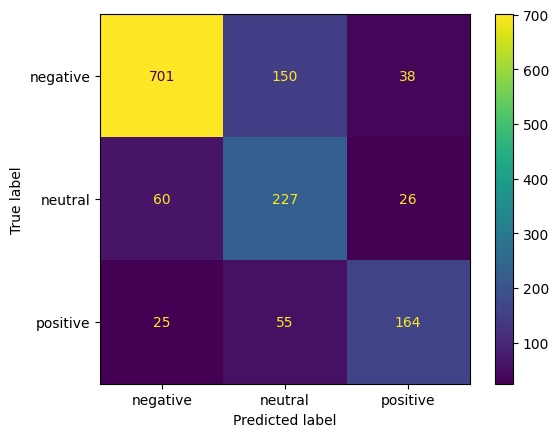

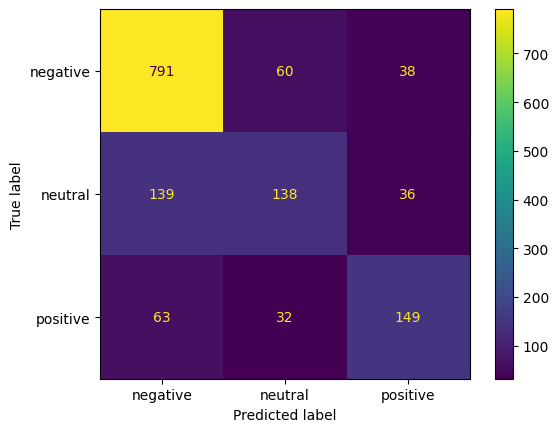

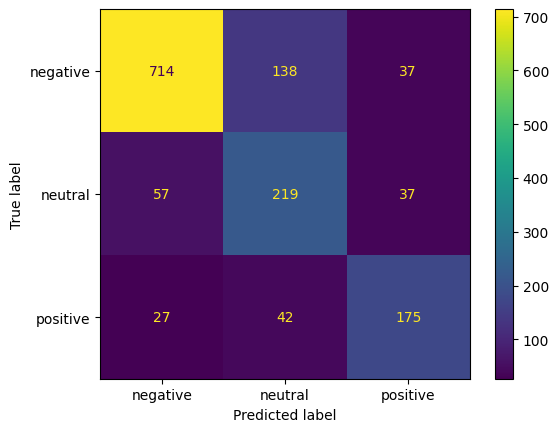

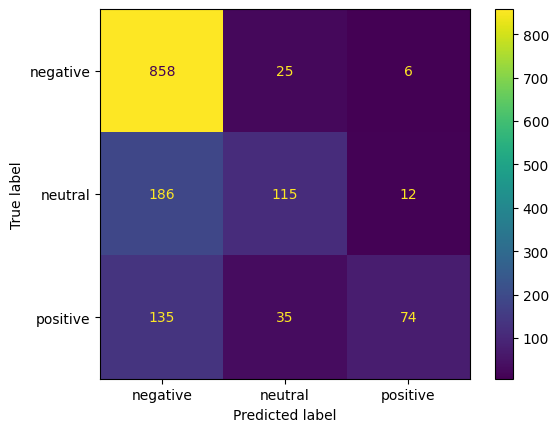

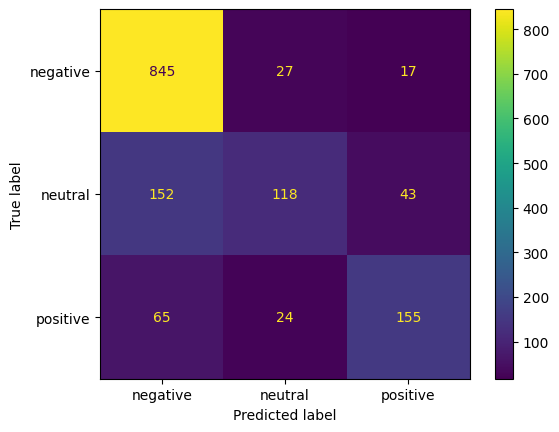

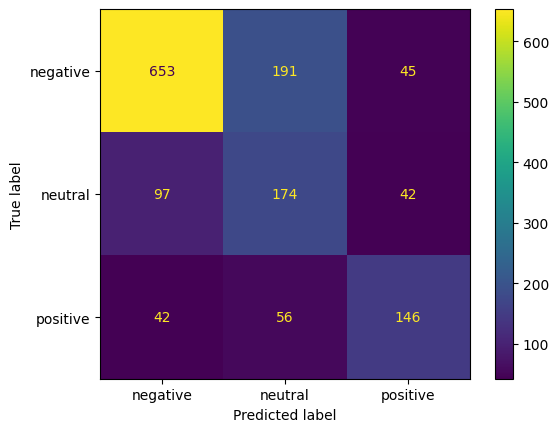

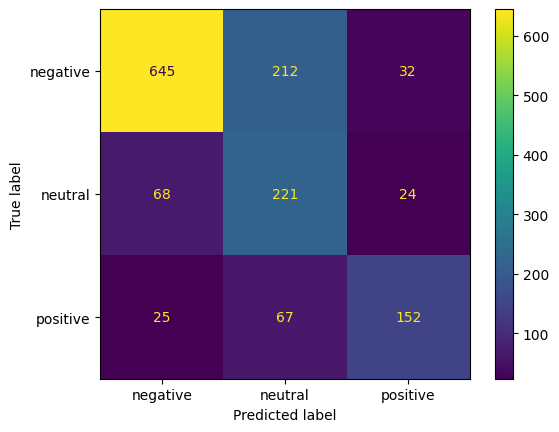

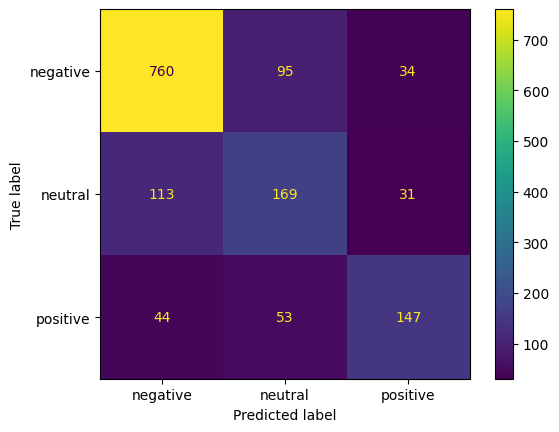

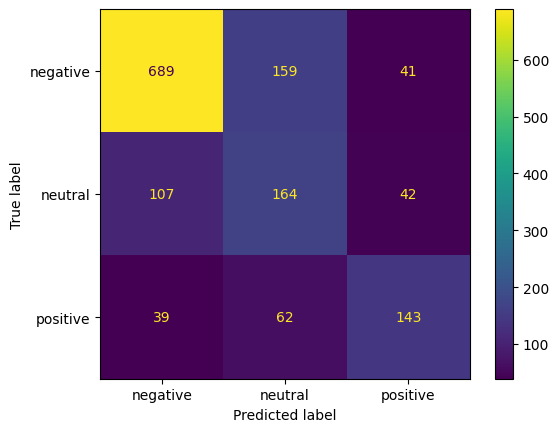

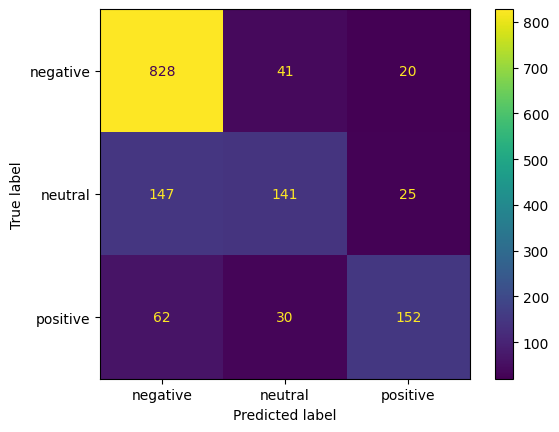

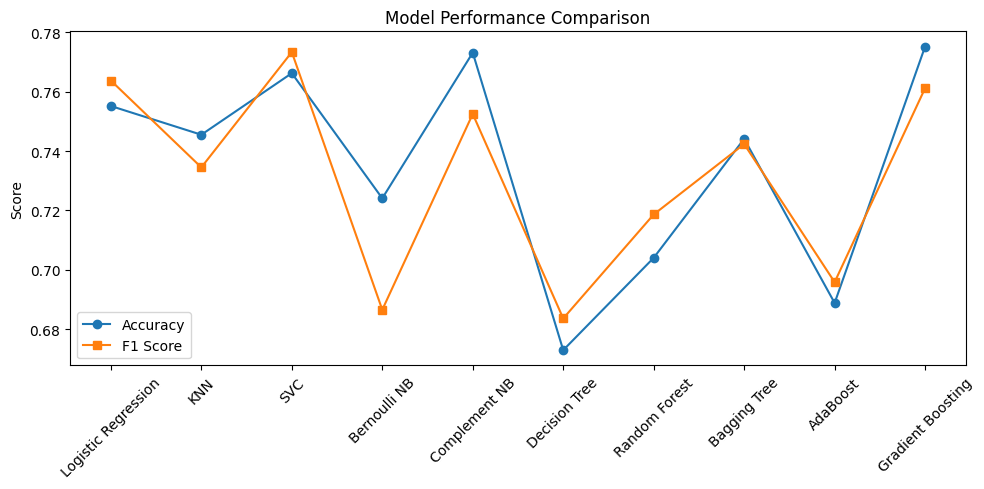

In [2]:
# Full Sentiment Analysis with Model Comparison (Kaggle Compatible)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('/kaggle/input/twitter-irline-sentiment/Tweets.csv')
df = df[['text', 'airline_sentiment']]
df.drop_duplicates(inplace=True)

# Clean text function
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['text'] = df['text'].apply(clean_text)

# Split into features and labels
from sklearn.model_selection import train_test_split
X = df['text']
y = df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Define models
models = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced', C=0.1, solver='sag', multi_class='multinomial')),
    ('KNN', KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12, weights='distance')),
    ('SVC', SVC(class_weight='balanced', C=1, gamma=1, kernel='linear')),
    ('Bernoulli NB', BernoulliNB()),
    ('Complement NB', ComplementNB()),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42)),
    ('Random Forest', RandomForestClassifier(class_weight='balanced', criterion='entropy', n_estimators=400, max_depth=15, random_state=42)),
    ('Bagging Tree', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42), n_estimators=300, bootstrap=True, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42), n_estimators=100, learning_rate=0.1, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, random_state=42))
]

# Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

accuracy_scores = []
f1_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    print("\n" + "="*80 + "\n")

# Plot model performance
model_names = [name for name, _ in models]
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_scores, marker='o', label='Accuracy')
plt.plot(model_names, f1_scores, marker='s', label='F1 Score')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('/kaggle/input/twitter-irline-sentiment/Tweets.csv')
df = df[['text', 'airline_sentiment', 'negativereason', 'tweet_location']].drop_duplicates()

In [4]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    return text

df['text'] = df['text'].apply(clean_text)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['text']
y = df['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


Model: Logistic Regression
              precision    recall  f1-score   support

    negative       0.88      0.78      0.83       913
     neutral       0.51      0.67      0.58       314
    positive       0.62      0.65      0.63       226

    accuracy                           0.74      1453
   macro avg       0.67      0.70      0.68      1453
weighted avg       0.76      0.74      0.74      1453


Model: KNN
              precision    recall  f1-score   support

    negative       0.79      0.86      0.82       913
     neutral       0.52      0.40      0.46       314
    positive       0.58      0.54      0.56       226

    accuracy                           0.71      1453
   macro avg       0.63      0.60      0.61      1453
weighted avg       0.70      0.71      0.70      1453


Model: SVC
              precision    recall  f1-score   support

    negative       0.89      0.80      0.84       913
     neutral       0.54      0.65      0.59       314
    positive       0.62

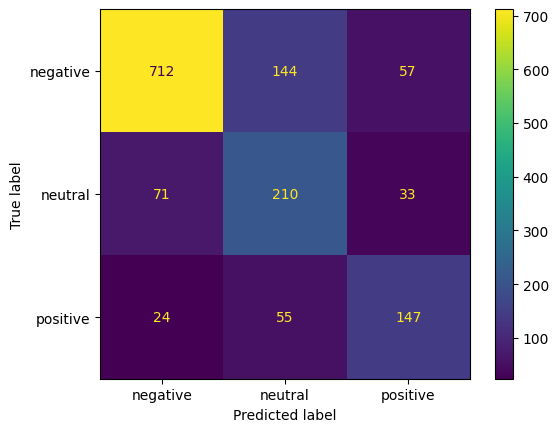

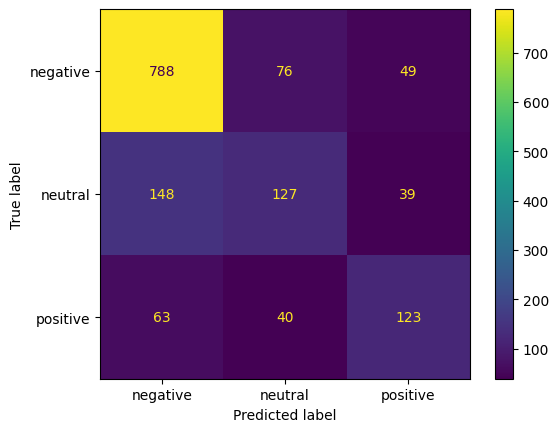

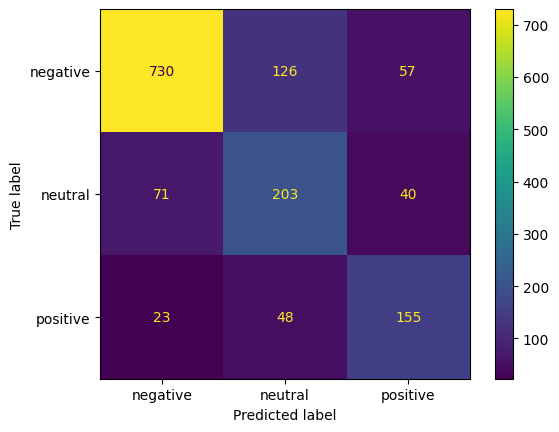

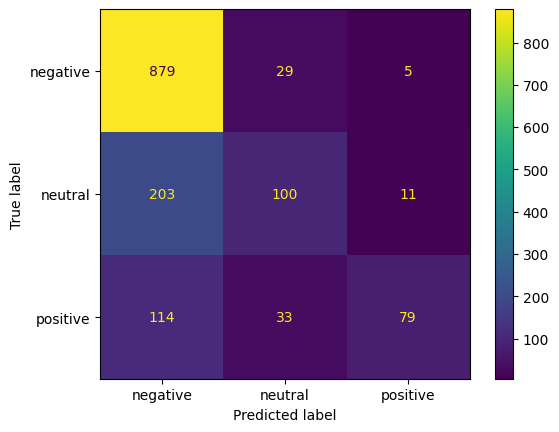

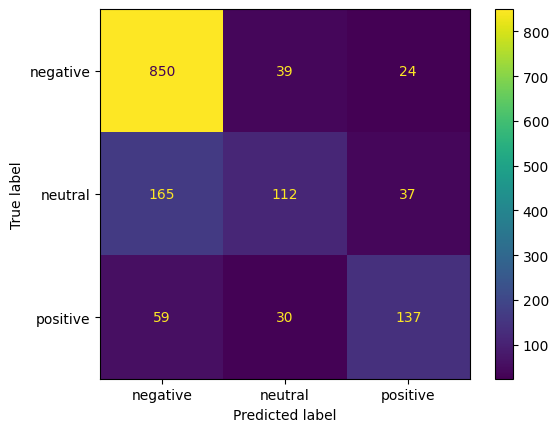

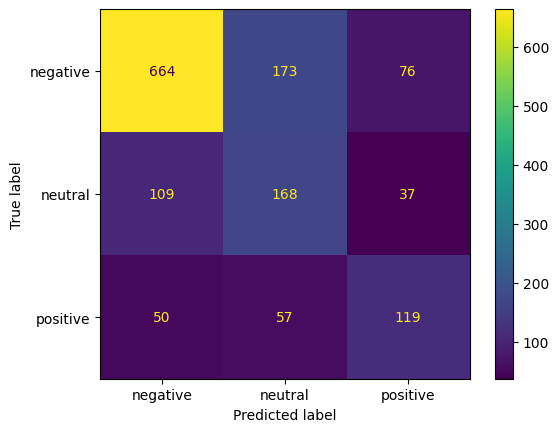

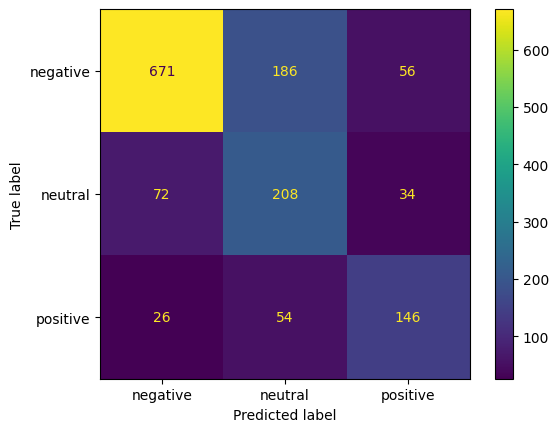

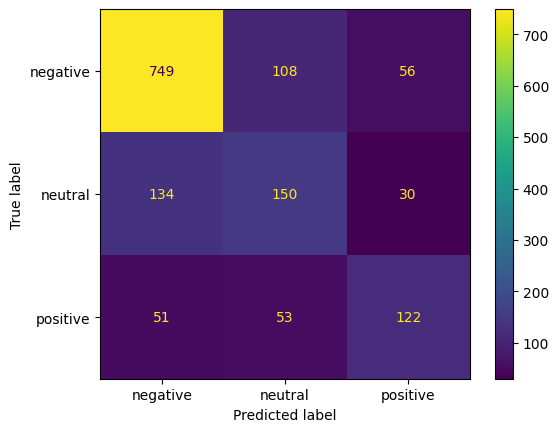

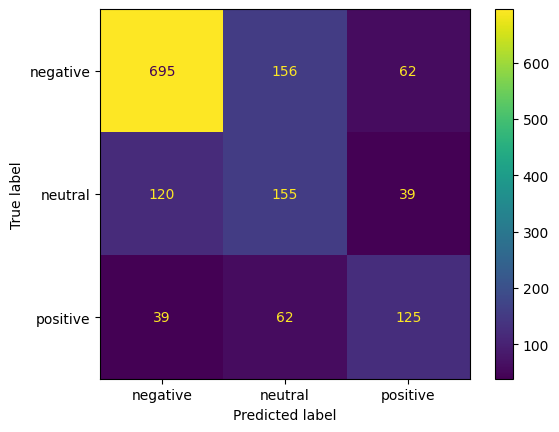

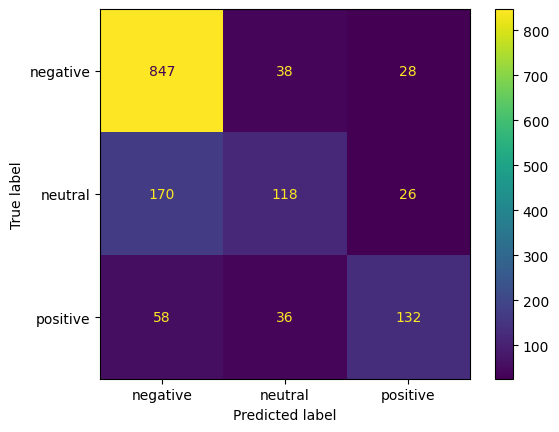

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

models = [
    ('Logistic Regression', LogisticRegression(class_weight='balanced', C=0.1, solver='sag', multi_class='multinomial')),
    ('KNN', KNeighborsClassifier(algorithm='ball_tree', n_neighbors=12, weights='distance')),
    ('SVC', SVC(class_weight='balanced', C=1, gamma=1, kernel='linear')),
    ('Bernoulli NB', BernoulliNB()),
    ('Complement NB', ComplementNB()),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced', random_state=42)),
    ('Random Forest', RandomForestClassifier(class_weight='balanced', criterion='entropy', n_estimators=400, max_depth=15, random_state=42)),
    ('Bagging Tree', BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42), n_estimators=300, bootstrap=True, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced', random_state=42), n_estimators=100, learning_rate=0.1, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=200, random_state=42))
]

accuracy_scores = []
f1_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_scores.append(acc)
    f1_scores.append(f1)

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

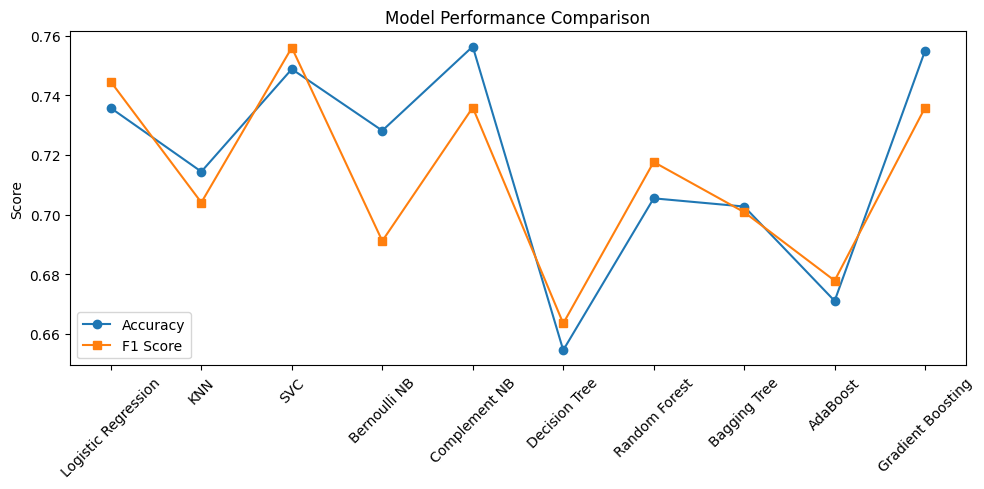

In [7]:
model_names = [name for name, _ in models]
plt.figure(figsize=(10, 5))
plt.plot(model_names, accuracy_scores, marker='o', label='Accuracy')
plt.plot(model_names, f1_scores, marker='s', label='F1 Score')
plt.xticks(rotation=45)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.legend()
plt.tight_layout()
plt.show()

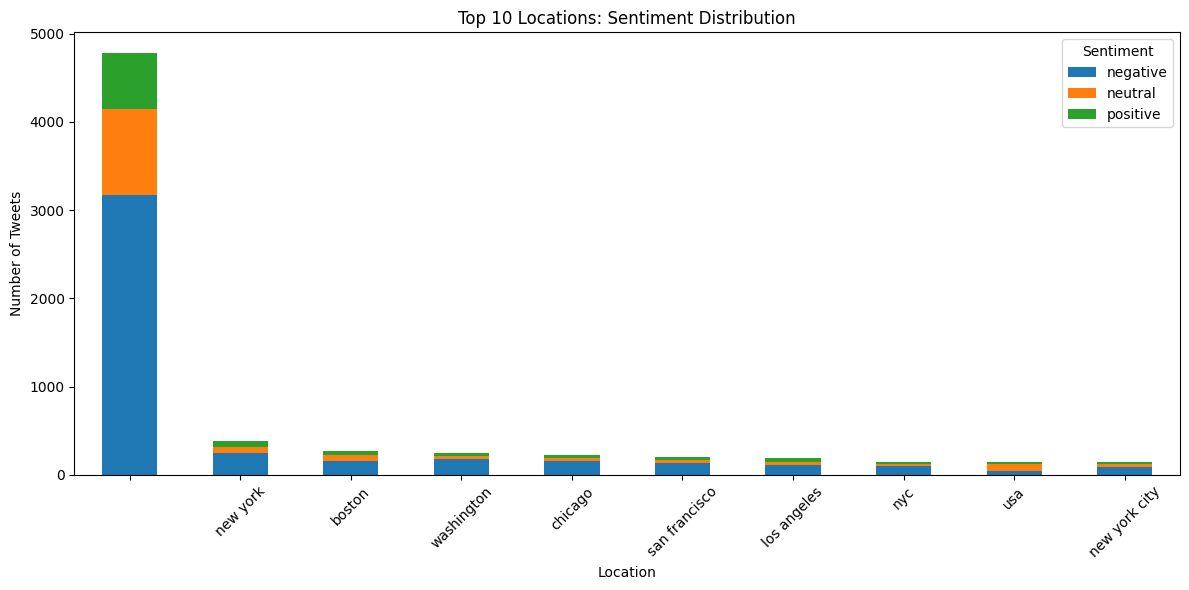

In [8]:
df['tweet_location'] = df['tweet_location'].str.extract(r'([A-Za-z\s]+)')[0].fillna('').str.lower().str.strip()

state_sentiments = df.groupby(['tweet_location', 'airline_sentiment']).size().unstack(fill_value=0)
top_states = state_sentiments.sum(axis=1).sort_values(ascending=False).head(10)
top_state_sentiments = state_sentiments.loc[top_states.index]

top_state_sentiments.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Top 10 Locations: Sentiment Distribution")
plt.ylabel("Number of Tweets")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

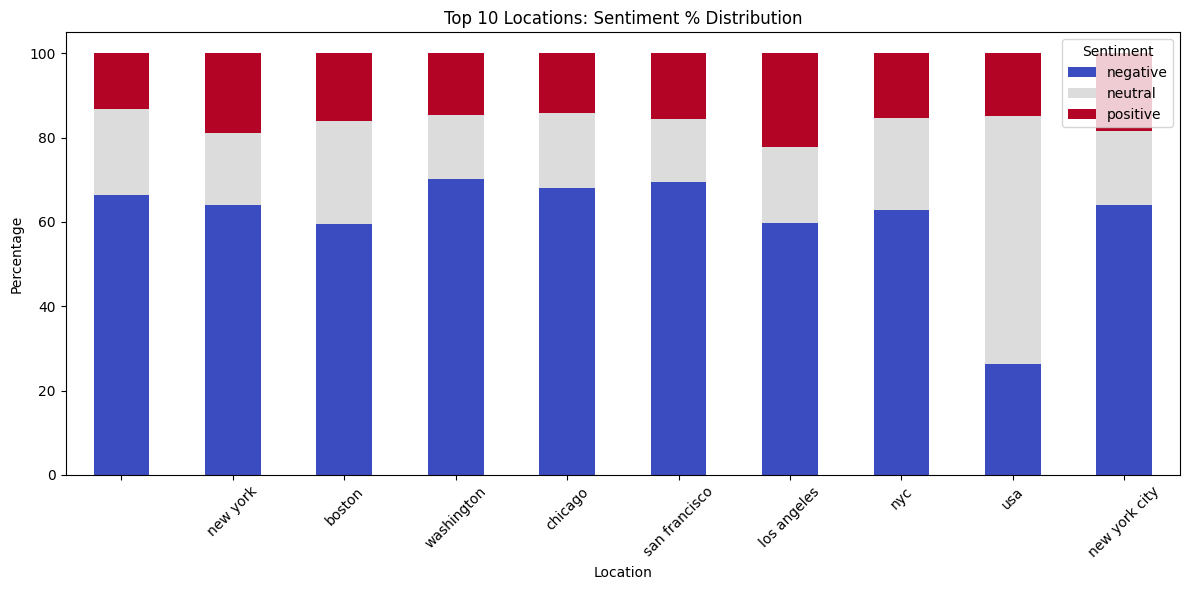

In [9]:
state_percent = top_state_sentiments.div(top_state_sentiments.sum(axis=1), axis=0) * 100
state_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Top 10 Locations: Sentiment % Distribution")
plt.ylabel("Percentage")
plt.xlabel("Location")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

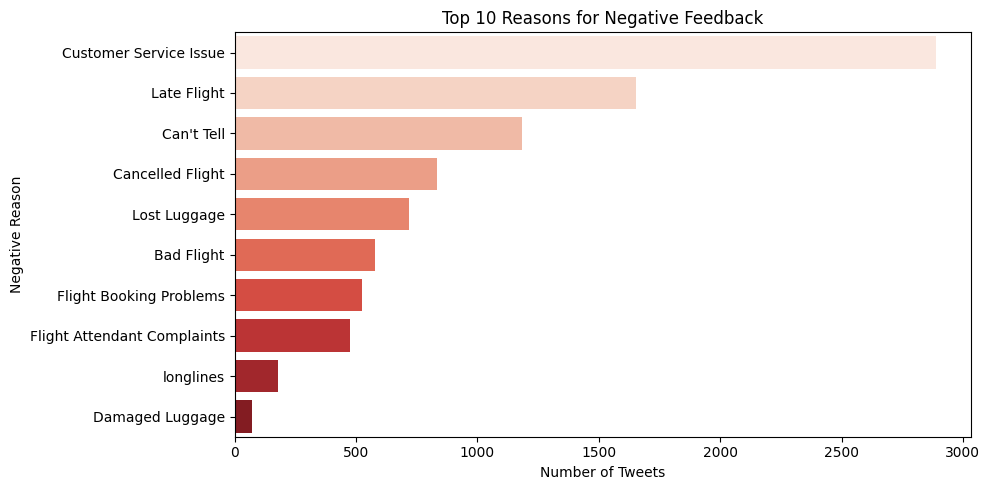

In [10]:
neg_reasons = df[df['airline_sentiment'] == 'negative']['negativereason'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=neg_reasons.values, y=neg_reasons.index, palette='Reds')
plt.title("Top 10 Reasons for Negative Feedback")
plt.xlabel("Number of Tweets")
plt.ylabel("Negative Reason")
plt.tight_layout()
plt.show()

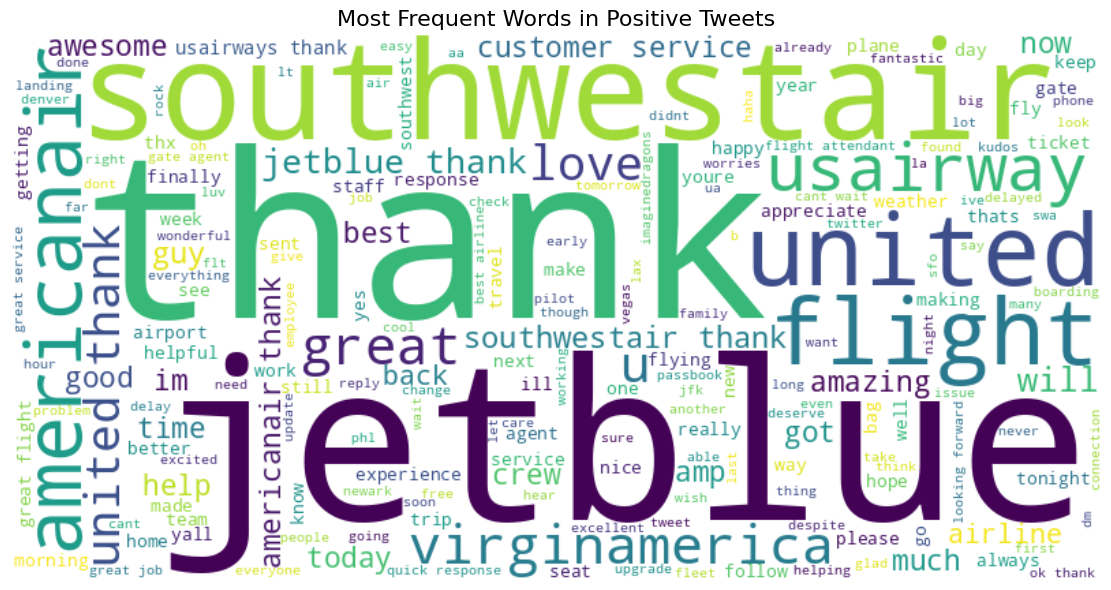

In [11]:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['airline_sentiment'] == 'positive']['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Positive Tweets", fontsize=16)
plt.tight_layout()
plt.show()

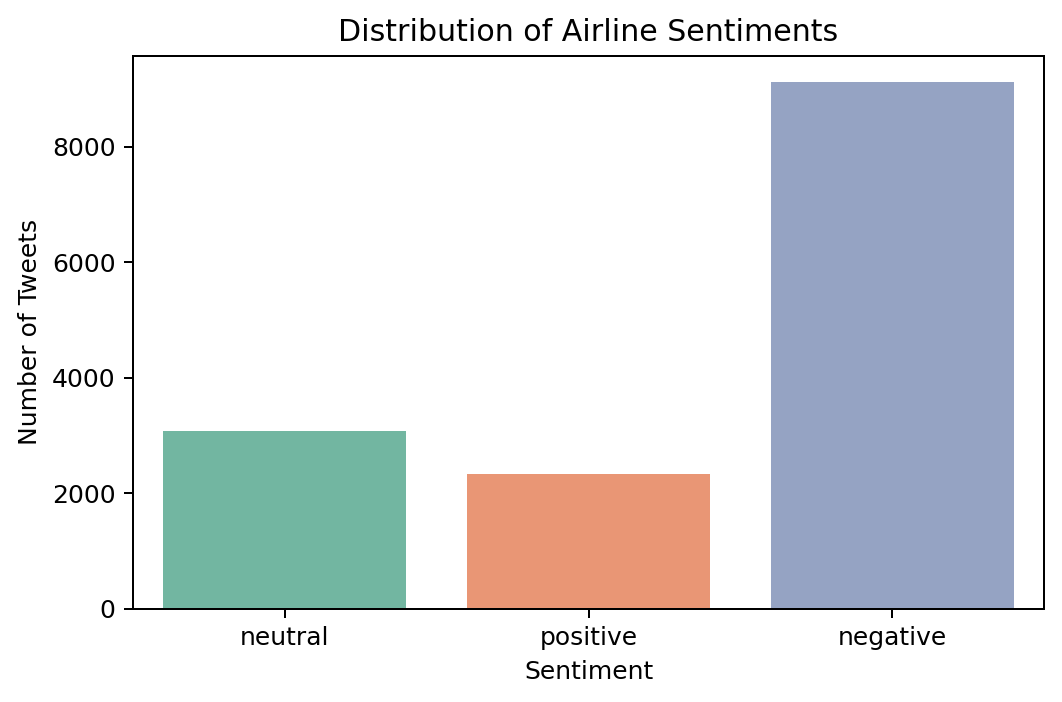

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4), dpi=180)  # Slightly wider for better labels
sns.countplot(data=df, x='airline_sentiment', palette='Set2')

plt.title("Distribution of Airline Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()


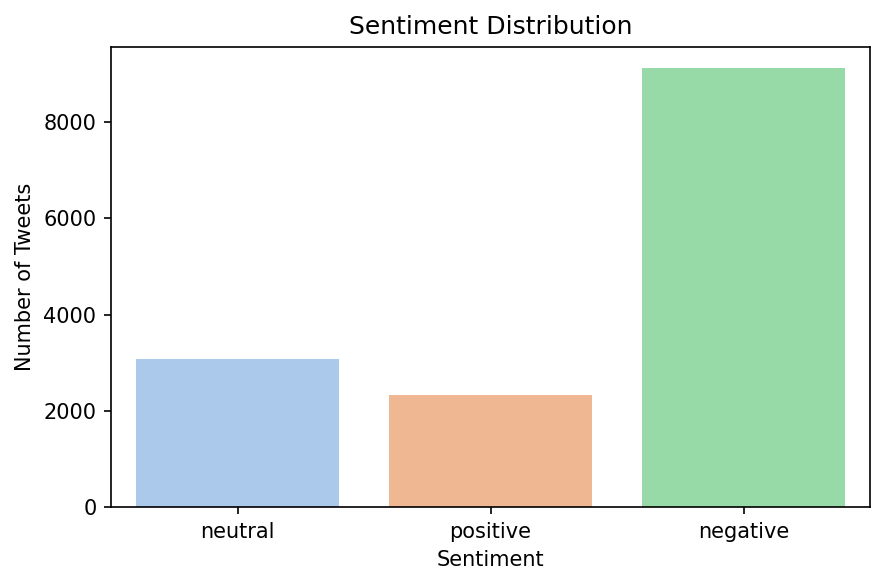

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4), dpi=150)
sns.countplot(data=df, x='airline_sentiment', palette='pastel')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X2 = vectorizer.fit_transform(df[df['airline_sentiment'] == 'negative']['text'])
bigrams = pd.DataFrame(X2.sum(axis=0), columns=vectorizer.get_feature_names_out()).T
bigrams.columns = ['Frequency']
bigrams.sort_values('Frequency', ascending=False).head(10)


,Frequency
customer service,440
cancelled flightled,432
late flight,218
flight cancelled,205
cancelled flighted,195
late flightr,142
cancelled flight,120
flight delayed,120
united flight,103
booking problems,97


In [15]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=2)
X_topics = vectorizer.fit_transform(df['text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_topics)

for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx+1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print()


Topic #1:
['worst', 'flights', 'jetblue', 'flightled', 'southwestair', 'united', 'americanair', 'usairways', 'cancelled', 'flight']

Topic #2:
['southwestair', 'fleets', 'fleek', 'gate', 'americanair', 'plane', 'usairways', 'united', 'flight', 'jetblue']

Topic #3:
['tomorrow', 'help', 'jetblue', 'cancelled', 'southwestair', 'usairways', 'flight', 'united', 'thanks', 'americanair']

Topic #4:
['sent', 'dm', 'just', 'usairways', 'americanair', 'flight', 'jetblue', 'southwestair', 'united', 'thank']

Topic #5:
['bag', 'phone', 'southwestair', 'customer', 'flight', 'service', 'jetblue', 'americanair', 'united', 'usairways']



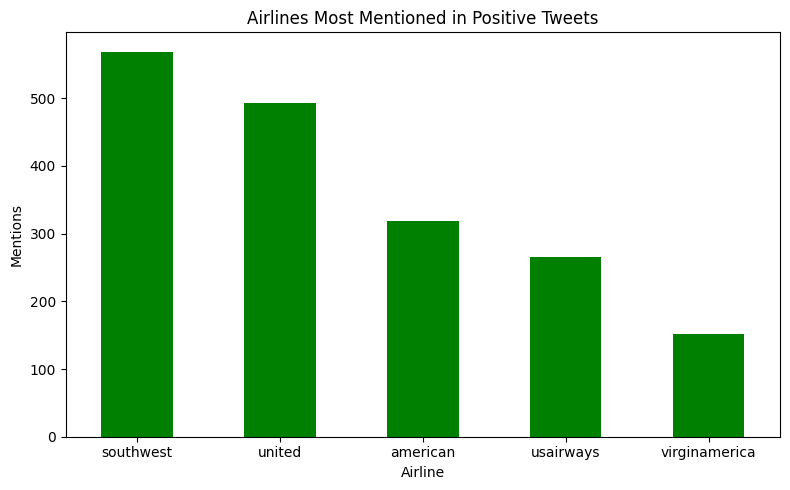

In [16]:
positive_mentions = df[df['airline_sentiment'] == 'positive']['text'].str.extract('(united|delta|southwest|virginamerica|usairways|american)', expand=False)
positive_mentions.value_counts().plot(kind='bar', figsize=(8,5), color='green')
plt.title("Airlines Most Mentioned in Positive Tweets")
plt.ylabel("Mentions")
plt.xlabel("Airline")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


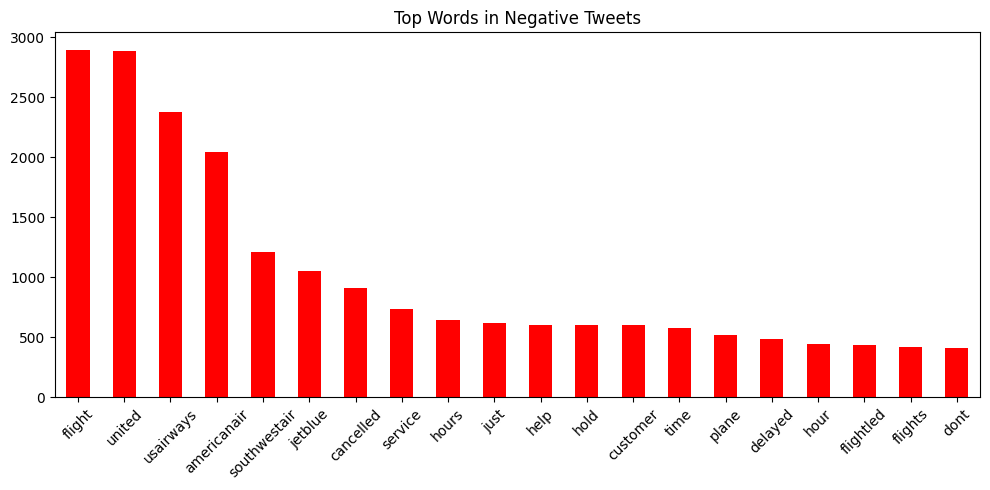

In [17]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

neg_words = ' '.join(df[df['airline_sentiment'] == 'negative']['text']).split()
filtered_words = [w for w in neg_words if w not in ENGLISH_STOP_WORDS and len(w) > 3]
word_counts = pd.Series(Counter(filtered_words)).sort_values(ascending=False).head(20)

word_counts.plot(kind='bar', figsize=(10,5), color='red')
plt.title("Top Words in Negative Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


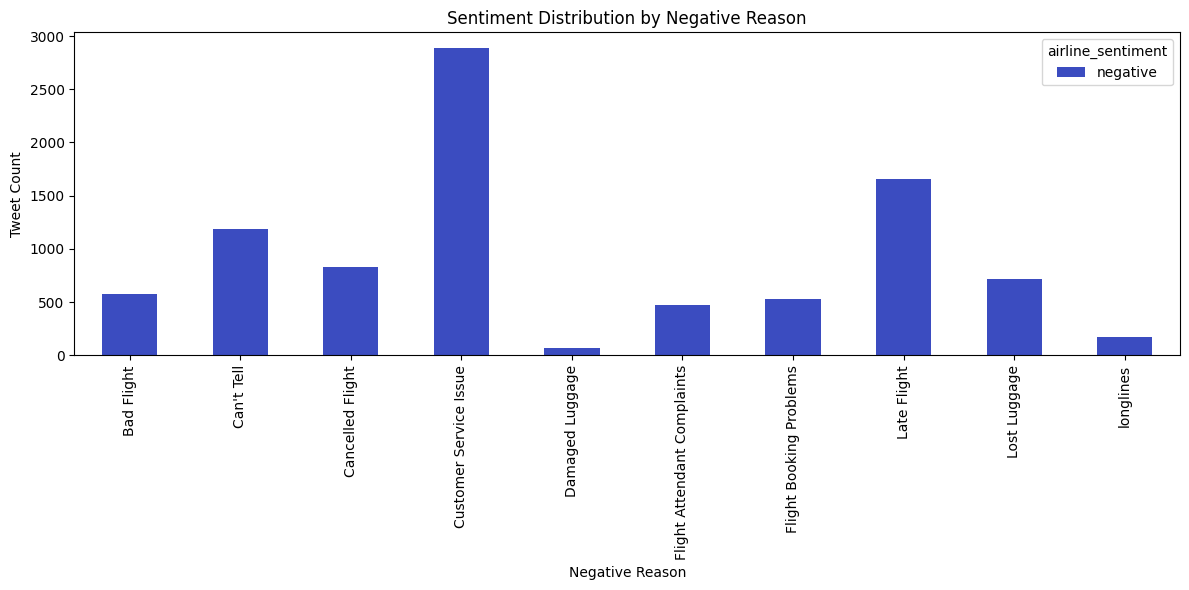

In [18]:
reason_sentiment = df[df['negativereason'].notnull()].groupby(['negativereason', 'airline_sentiment']).size().unstack(fill_value=0)
reason_sentiment.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Sentiment Distribution by Negative Reason")
plt.xlabel("Negative Reason")
plt.ylabel("Tweet Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


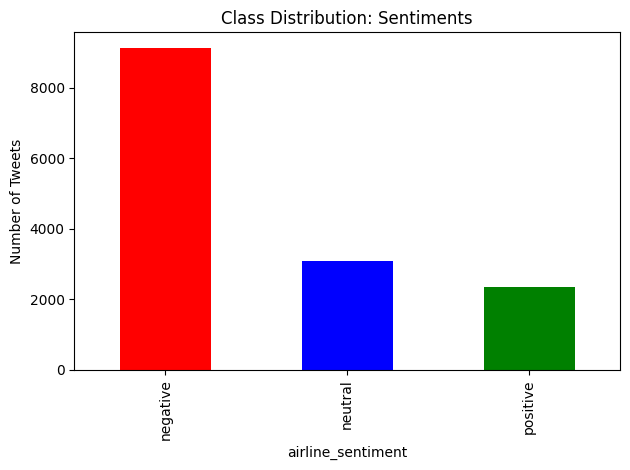

In [19]:
df['airline_sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Class Distribution: Sentiments")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()


In [20]:
positive_mentions = df[df['airline_sentiment'] == 'positive']['text'].str.extract(
    r'(united|delta|southwest|virginamerica|usairways|american)', expand=False)
positive_mentions_table = positive_mentions.value_counts().reset_index()
positive_mentions_table.columns = ['Airline', 'Mentions']
positive_mentions_table


,Airline,Mentions
0,southwest,569
1,united,493
2,american,318
3,usairways,265
4,virginamerica,152


In [21]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

neg_words = ' '.join(df[df['airline_sentiment'] == 'negative']['text']).split()
filtered_words = [w for w in neg_words if w not in ENGLISH_STOP_WORDS and len(w) > 3]
word_counts_table = pd.Series(Counter(filtered_words)).sort_values(ascending=False).head(20).reset_index()
word_counts_table.columns = ['Word', 'Count']
word_counts_table


,Word,Count
0,flight,2895
1,united,2882
2,usairways,2372
3,americanair,2044
4,southwestair,1211
5,jetblue,1049
6,cancelled,907
7,service,736
8,hours,645
9,just,614


In [22]:
reason_sentiment_table = df[df['negativereason'].notnull()] \
    .groupby(['negativereason', 'airline_sentiment']) \
    .size().unstack(fill_value=0).reset_index()
reason_sentiment_table


airline_sentiment,negativereason,negative
0,Bad Flight,578
1,Can't Tell,1186
2,Cancelled Flight,835
3,Customer Service Issue,2890
4,Damaged Luggage,74
5,Flight Attendant Complaints,476
6,Flight Booking Problems,527
7,Late Flight,1655
8,Lost Luggage,719
9,longlines,177
